In [181]:
# import the libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time
import nltk
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [169]:
# Create lists to store the scraped data

theme = []
tag = []
title = []
authors = []
dates = []
links = []
texts = []
summarys = []

# function

In [170]:
# Create a function to scrape the website

def scrape_website(theme):
    page_theme = str(theme)
    url = 'https://www.cnnbrasil.com.br/tudo-sobre/' + page_theme + '/'
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')

    # Get the location of the information
    article_date = soup.find_all('span', attrs= {'class': 'home__title__date'}) # location of data information
    article_title = soup.find_all('h2', attrs= {'class': 'news-item-header__title'} ) # location of title information
    article_tag = soup.find_all('span', attrs= {'class': 'latest__news__category'} ) # location of the tag
    article_theme = soup.find_all('h1', attrs= {'class': 'tags__topics__title strong'} ) # location of the theme
    
    # Loop through the article_date
    for i in article_date:
        link1 = i.text.strip()
        date_and_time = link1.split()
        date = date_and_time[0]
        time = date_and_time[4]

# tests

In [171]:
page_theme = 'Energia'
page_number = '1'


url = 'https://www.cnnbrasil.com.br/tudo-sobre/' + page_theme + '/' + 'pagina' + page_number +'/' 
webpage = requests.get(url)
soup = BeautifulSoup(webpage.text, 'html.parser')

# Get the location of the information
article_date = soup.find_all('span', attrs= {'class': 'home__title__date'}) # location of data information
article_title = soup.find_all('h2', attrs= {'class': 'news-item-header__title'} ) # location of title information
article_tag = soup.find_all('span', attrs= {'class': 'latest__news__category'} ) # location of the tag
article_theme = soup.find_all('h1', attrs= {'class': 'tags__topics__title'} ) # location of the theme
article_links = soup.find_all('a',attrs={'class': 'home__list__tag'} )# location of the links


In [172]:
# Loop through the article_date
for i in article_date:
    temp=0
    temp = i.text.strip()
    date = temp[0:10]
    time = temp[14:19]
    date_time = date +'-'+ time

    date_time = pd.to_datetime(date_time,format= '%d/%m/%Y-%H:%M').strftime('%d/%m/%Y - %H:%M')
    dates.append(date_time)
# dates


In [173]:
# Loop through the article_titles and set the theme
for i in article_title:
    temp = 0
    temp = i.text.strip()
    title.append(temp)
    theme.append(article_theme[0].text.strip().split()[2])

In [174]:
# Loop through the article_tags
for i in article_tag:
    temp = 0
    temp = i.text.strip()
    tag.append(temp)


In [175]:
# Loop through the article_links
for i in article_links:
    href = i.get('href')
    links.append(href)

In [176]:
for i in links:
    article = Article(i)
    article.download()
    article.parse()

    nltk.download('punkt') # "Punkt Tokenizer Models" divides the text into a list of sentences using ML algorithm
    article.nlp()

    site_name = article.meta_data['og']['site_name']
    # title = article.meta_data['og']['title']
    text = article.text
    summary = article.summary
    # author = article.authors
    texts.append(text)
    summarys.append(summary)
    authors.append(site_name)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\

In [177]:
print(
    len(authors), 
    len(links), 
    len(theme), 
    len(tag), 
    len(title),
    len(dates), 
    len(texts), 
    len(summarys) 
)

df = pd.DataFrame( columns= ['dates','theme','authors','tag','title','summarys','texts','links' ] )
df.dates = dates
df.dates = pd.to_datetime(df.dates,format= '%d/%m/%Y - %H:%M')
df.theme = theme
df.authors = authors
df.tag = tag
df.title = title
df.summarys = summarys
df.texts = texts
df.links = links
df

30 30 30 30 30 30 30 30


,dates,theme,authors,tag,title,summarys,texts,links
0,2022-05-13 16:35:00,Energia,CNN Brasil,Internacional,Rússia cortará fornecimento de eletricidade pa...,"“A RAO Nordic Oy, uma subsidiária da entidade ...",Operadora do sistema de transmissão da Finlând...,https://www.cnnbrasil.com.br/internacional/rus...
1,2022-05-13 07:32:00,Energia,CNN Brasil,Business,Produção industrial da zona do euro cai menos ...,"Em termos anuais, a produção de energia caiu 4...","Em termos anuais, a produção de energia caiu 4...",https://www.cnnbrasil.com.br/business/producao...
2,2022-05-12 16:42:00,Energia,CNN Brasil,Business,Europa está ficando sem tempo para encontrar a...,A Rússia respondeu por cerca de 45% das import...,"""Os governos precisam agir agora como se estiv...",https://www.cnnbrasil.com.br/business/europa-e...
3,2022-05-10 14:29:00,Energia,CNN Brasil,Business,Rússia precisa vender petróleo e está ficando ...,Países como a Índia continuam abocando centena...,Tanques de petróleo em Omsk na Rússia: receita...,https://www.cnnbrasil.com.br/business/russia-p...
4,2022-05-10 09:21:00,Energia,CNN Brasil,Nacional,A “minirreforma tributária” e o déjà vu do con...,A intenção de Guedes é mexer nas alíquotas par...,Thais Herédia e Priscila Yazbek apresentam o p...,https://www.cnnbrasil.com.br/nacional/podcast-...
5,2022-05-09 09:32:00,Energia,CNN Brasil,Nacional,Mercado acredita que inflação nos EUA e Brasil...,Os investidores estão cautelosos com a divulga...,Thais Herédia e Priscila Yazbek apresentam o p...,https://www.cnnbrasil.com.br/nacional/podcast-...
6,2022-05-05 17:22:00,Energia,CNN Brasil,Business,"Mais petróleo pode ser liberado, se necessário...","De acordo com ele, só uma parte dos estoques d...",Soluções do lado da demanda também são importa...,https://www.cnnbrasil.com.br/business/mais-pet...
7,2022-05-05 07:50:00,Energia,CNN Brasil,Business,Japão utilizará reatores nucleares para reduzi...,Primeiro-ministro prometeu 150 trilhões de ien...,Primeiro-ministro prometeu 150 trilhões de ien...,https://www.cnnbrasil.com.br/internacional/jap...
8,2022-05-04 21:32:00,Energia,CNN Brasil,Business,Senado aprova projeto que deve facilitar linha...,O texto declara que a passagem da rede elétric...,"Governador de Roraima, Antonio Denarium, se re...",https://www.cnnbrasil.com.br/business/senado-a...
9,2022-05-04 08:50:00,Energia,CNN Brasil,Business,Opep+ vê superávit maior em 2022 em meio a cre...,Ilustração fotográfica com uma bomba de extraç...,Ilustração fotográfica com uma bomba de extraç...,https://www.cnnbrasil.com.br/business/opep-ve-...


In [178]:
date_min = str(df.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.min())
date_max = str(df.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.max())

date_range = 'Date Rage: from ['+ date_min + '] to [' + date_max + ']'

date_range


# date_range = str(df['dates'].dt.date.min()) + ' to ' +str(df['dates'].dt.date.max())
# date_range.dt.strftime('%d/%m/%Y - %H:%M')



'Date Rage: from [19/04/2022 at 04:30:00] to [13/05/2022 at 21:32:00]'

In [264]:
text = " ".join(s.lower() for s in df.texts)
wordcloud_theme = df.theme[0].lower()
wordcloud_title = df.authors[0] +'--'+ date_range

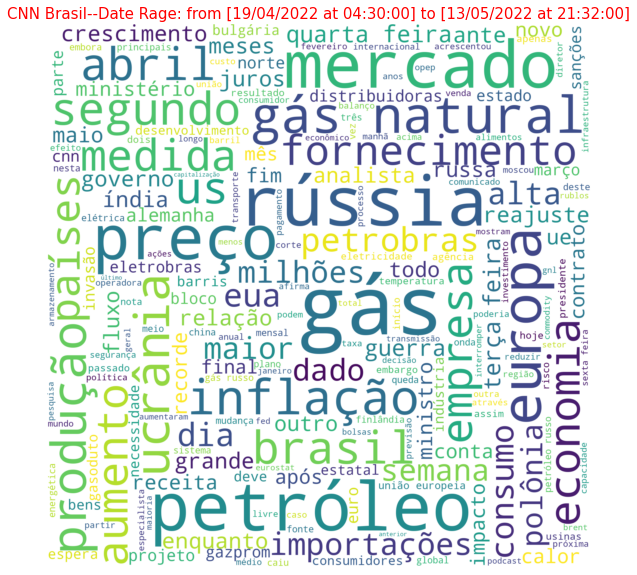

In [271]:
PORTUGUESE_STOPWORDS_PATCH = r'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt'


response_PATCH = requests.get(PORTUGUESE_STOPWORDS_PATCH)

pt_stopwords = response_PATCH.text

pt_stopwords = pt_stopwords.replace(" ","").splitlines()   

stop_words  = list(pt_stopwords) + list(STOPWORDS) + [wordcloud_theme,'cerca','país','disse','agora', 'ouvir','notícia', 'ano' , 'entanto','episódio','ainda','acordo','demanda','pode','desde','sobre']


plt.figure(figsize=(20,10))


wordcloud = WordCloud(min_font_size=20, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stop_words,
               width=2000, 
               height=2000,
               normalize_plurals= True
).generate(text)




plt.title(wordcloud_title, fontsize=15, color="red")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()